In [1]:
import pandas as pd
import numpy  as np
import pickle
import random

In [2]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [163]:
def load_pickle_file(file):    
    with open(file,"rb") as d:
        result = pickle.load(d)
    return result

In [185]:
train  = load_pickle_file("data/train_image.pkl")
labels = load_pickle_file("data/train_label.pkl")
# test   = load_pickle_file("data/test_image.pkl")

In [186]:
print("Original labels : ",set(labels))

Original labels :  {0, 2, 3, 6}


In [187]:
#mapping to new labels .    0->0  , 2->1, 3->2 , 6->3
#because after onehot encoding 6, it will be [0,0,0,0,0,1], but 3 will be [0,0,0,1]
for i in range(len(labels)):
    x = labels[i]
    if x==2:
        labels[i]=1
    if x==3:
        labels[i]=2
    if x==6:
        labels[i]=3

In [188]:
print("New labels : ",set(labels)) # for converting to categorical.

New labels :  {0, 1, 2, 3}


In [189]:
#randomly shuffling training set, because initially it is all 0's first,then 2's,then 3's,then 6's
train_set = list(zip(train,labels))

random.shuffle(train_set)

train, labels = zip(*train_set)

In [190]:
print("Training set size : ",len(train))

#Last 2000 rows for validation 
test = train[6000:]
label_test  = labels[6000:]

#First 6000 rows for Training
train = train[:6000]
label_train = labels[:6000]



print("Train : ",len(train))
print("Validation : ":len(test))

Training set size :  8000
6000
2000


In [191]:
import tensorflow as tf
print(tf.VERSION)

1.7.1


In [192]:
X = np.array(train)
y = to_categorical(np.array(label_train))

In [193]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(test)
y_test = to_categorical(np.array(label_test))

In [194]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [200]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [212]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(4, activation='softmax'))

In [213]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 64)        18496     
__________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [214]:
history4 = cnn4.fit_generator(batches, steps_per_epoch=6000//256, epochs=50,
                    validation_data=val_batches, validation_steps=2000//256, use_multiprocessing=True)

Epoch 1/50
23/23 [==============================] - 29s 1s/step - loss: 1.3864 - acc: 0.5249 - val_loss: 0.9292 - val_acc: 0.6495
Epoch 2/50
23/23 [==============================] - 26s 1s/step - loss: 1.0324 - acc: 0.6153 - val_loss: 0.7861 - val_acc: 0.6857
Epoch 3/50
23/23 [==============================] - 27s 1s/step - loss: 0.8891 - acc: 0.6506 - val_loss: 0.6425 - val_acc: 0.7292
Epoch 4/50
23/23 [==============================] - 27s 1s/step - loss: 0.7786 - acc: 0.6781 - val_loss: 0.6715 - val_acc: 0.7144
Epoch 5/50
23/23 [==============================] - 27s 1s/step - loss: 0.7412 - acc: 0.7000 - val_loss: 0.6282 - val_acc: 0.7286
Epoch 6/50
23/23 [==============================] - 30s 1s/step - loss: 0.6933 - acc: 0.7166 - val_loss: 0.7032 - val_acc: 0.6828
Epoch 7/50
23/23 [==============================] - 31s 1s/step - loss: 0.6777 - acc: 0.7213 - val_loss: 0.6646 - val_acc: 0.6957
Epoch 8/50
23/23 [==============================] - 30s 1s/step - loss: 0.6338 - acc: 0.73

In [215]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.40669400203227996
Test accuracy: 0.8465


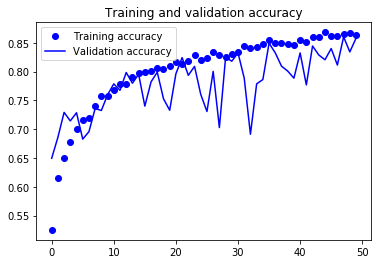

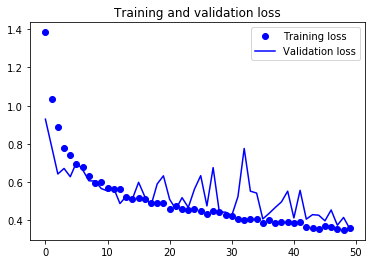

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history4.history['acc']
val_accuracy = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [217]:
predicted_classes = cnn4.predict_classes(X_test)

# get the indices to be plotted
y_true = label_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [218]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.74      0.82       488
     Class 1       0.95      0.82      0.88       519
     Class 2       0.94      0.92      0.93       510
     Class 3       0.66      0.91      0.76       483

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.87      0.85      0.85      2000



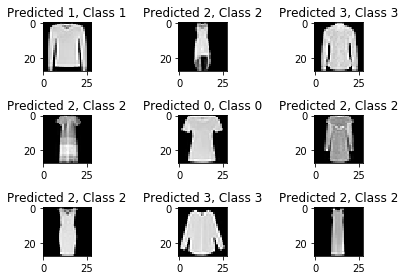

In [219]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

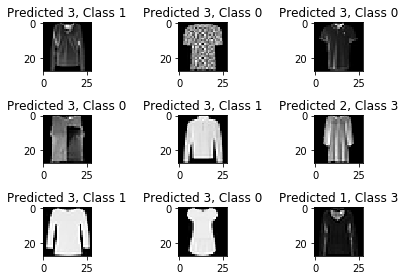

In [220]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [221]:
len(predicted_classes)

2000

In [222]:
#converting back to original classes
for i in range(len(predicted_classes)):
    x = predicted_classes[i]
    if x==1:
        predicted_classes[i]=2
    if x==2:
        predicted_classes[i]=3
    if x==3:
        predicted_classes[i]=6

In [223]:
predicted_classes

array([2, 3, 6, ..., 0, 0, 6])

In [224]:
with open("UTKARSH_SINGH.csv","w") as f:
    f.write("image_index,class\n")
    for i in range(len(predicted_classes)):
        f.write(str(i)+","+str(predicted_classes[i])+"\n")